# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [135]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [136]:
#def conv_fn(x,h):
#    H=len(h)
#    X=len(x)
#    X_pad=X+2*H
#    y = np.zeros((X_pad, ))
#    x_pad=np.zeros((X_pad))
#    x_pad[H:H+len(x)]=x
#    print (y)  #printing the whole range
#    print (h)
#    print (x)
#    h = h[::-1]
#    for i in range(0,X):
#        y[i]=0
#        for j in range (0,H):
#            y[i] = y[i] + x_pad[j]*h[j]
#    return y

#alpha
def conv_fn(x,h):
    end = len(x)+2*len(h)
    X_pad = np.zeros(end)
    X_pad[0:len(x)] = x[0:len(x)]
    X_pad[len(x):end] = 0
    y= np.zeros((end,))
    
    for i in range(0,len(X_pad)):
        for j in range (0, len(h)):
            y[i]=y[i]+X_pad[i-j]*h[j]
    print(y)
    return y



In [137]:
#x=[1,2,3,4]
#h=[0,0,1,0]
#conv_fn(x,h)

x = np.array([3,4,5])
h = np.array([2,1])
y= conv_fn(x,h)
print (y)

[  6.  11.  14.   5.   0.   0.   0.]
[  6.  11.  14.   5.   0.   0.   0.]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [163]:
def conv_2d(x,h, in_shape_x,in_shape_y,h_shape_x,h_shape_y):
    y= np.zeros((512,512))
    kCenterX =h_shape_y
    kCenterY =h_shape_x
    for i in range(0,in_shape_x):
        for j in range(0,in_shape_y):
            for m in range(0,h_shape_x):
                mm = h_shape_x -1 -m
                for n in range(0,h_shape_y):
                    nn = h_shape_y -1 -n
                    
                    ii = i + (m-kCenterY)
                    jj = j + (n-kCenterX)
                    
                    if( ii >= 0 and ii < in_shape_x and jj >= 0 and jj < in_shape_y):
                        y[i][j] = y[i][j] + x[ii][jj] * h[mm][nn]
                        
    return y

[[162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 ..., 
 [ 43  43  50 ..., 104 100  98]
 [ 44  44  55 ..., 104 105 108]
 [ 44  44  55 ..., 104 105 108]]


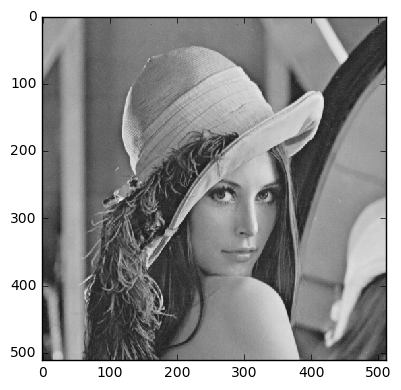

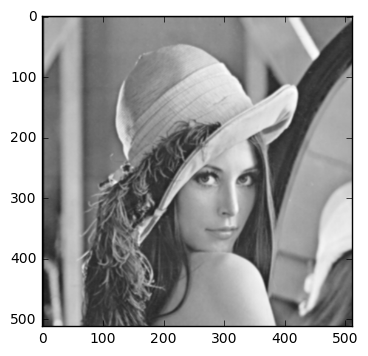

In [164]:
#First, let's define the kernel and flip it
K = np.zeros((5,5))
K = [1/256, 4/256, 6/256, 4/256, 1/256],[4/256, 16/256, 2/2564, 16/256, 4/256], [6/256, 24/256, 36/256, 24/256, 6/256], [4/256, 16/256, 24/256, 16/256, 4/256], [1/256, 4/256, 6/256, 4/256, 1/256]
Path = '../images/'
image_name = 'lena-grey.bmp'
lena_im = io.imread(Path.__add__(image_name))
plt.figure()
io.imshow(lena_im)
print (lena_im)


y= conv_2d(lena_im,K,512,512,5,5)
#plt.figure()
#io.imshow(y)

plt.figure()
plt.imshow(y,  cmap=plt.cm.gray)
plt.show()

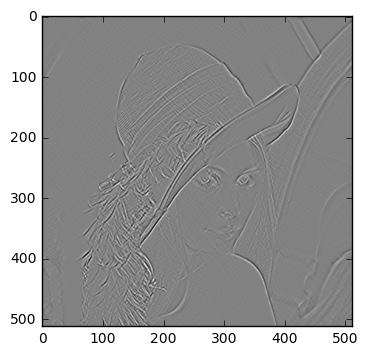

In [171]:
S1 = np.zeros((3,3))
S1 = [-1,0,1],[-2,0,2], [-1,0,1]  #first sobel filter
ys1= conv_2d(lena_im,S1,512,512,3,3)
#plt.figure()
#plt.imshow(ys1,  cmap=plt.cm.gray)
#plt.show()

S2 = np.zeros((3,3))
S2 = [-1,-2,-1],[0,0,0], [1,2,1]  #second sobel filter
ys2= conv_2d(lena_im,S2,512,512,3,3)
#plt.figure()
#plt.imshow(ys2,  cmap=plt.cm.gray)
#plt.show()

yst= conv_2d(conv_2d(lena_im,S1,512,512,3,3),S2,512,512,3,3)
plt.figure()
plt.imshow(yst,  cmap=plt.cm.gray)
plt.show()


## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

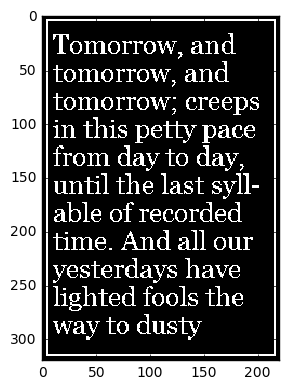

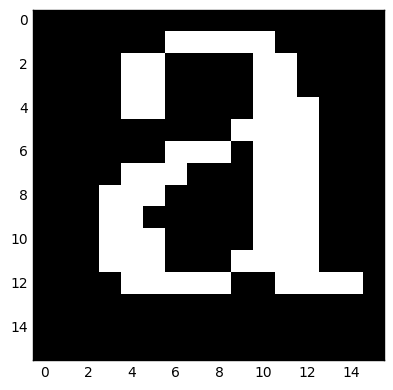

In [199]:
image_name = 'a.png'
a_im = io.imread(Path.__add__(image_name), as_grey=True)
plt.figure()
#io.imshow(a_im)
image_name = 'text.png'
text_im = io.imread(Path.__add__(image_name), as_grey=True)


from skimage.filters import threshold_otsu

inverted_A = 1- a_im
#plt.figure()
#io.imshow(inverted_A)
#plt.figure()
inverted_text = 1-text_im
#io.imshow(inverted_text)

#local_otsu = threshold_otsu(inverted_A, 256)
#global_otsu_A = inverted_A >= local_otsu
#plt.figure()
#io.imshow(global_otsu_A)

#local_otsu = threshold_otsu(inverted_text, 256)
#global_otsu_text = inverted_text >= local_otsu
#plt.figure()
#io.imshow(global_otsu_text)

#print (global_otsu_A)
#print(global_otsu_text)

s=threshold_otsu(text_im)
for i in range (text_im.shape[0]):
    for j in range (text_im.shape[1]):
        if text_im[i,j]>s:
            text_im[i,j]=0
        else:
            text_im[i,j]=1

plt.figure()
io.imshow(text_im)            

for i in range (a_im.shape[0]):
    for j in range (a_im.shape[1]):
        if a_im[i,j]>s:
            a_im[i,j]=0
        else:
            a_im[i,j]=1

plt.figure()
io.imshow(a_im)            

(320, 220)
6742


/home/dani/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dani/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


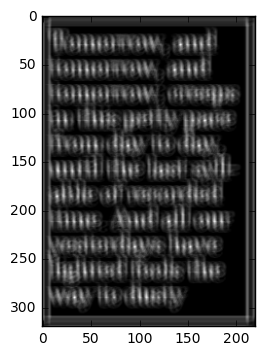

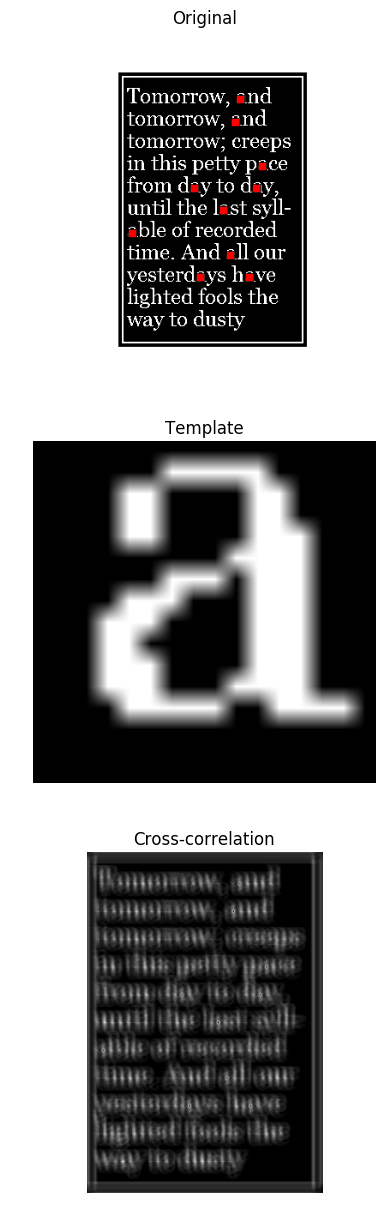

In [265]:
from scipy import signal
corr = signal.correlate2d(text_im,a_im, boundary='symm', mode='same')
plt.figure()
plt.imshow(corr, cmap=cm.Greys_r)
plt.show
print (corr.shape)
print (np.argmax(corr))

#So the idea is to take the components of each index, and after that we make that position to be 0
#so when we do the unravel_index again is not taken into account, so it can compute the next coincidence
y=np.zeros((10,))
x=np.zeros((10,))
for i in range (0,10):
    y[i], x[i] = np.unravel_index(np.argmax(corr), (corr.shape),  order='C')
    corr[y[i],x[i]]=0

fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))
ax_orig.imshow(text_im, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(a_im, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'rs')   #we are plotting now the whole array of coincidences

fig.show()